# COSC 3337 Lab 10 Minh Nguyen

## About K Means

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids. Refer back to the lecture video or slides for more detail on K Means.

## Implementation

Because K Means is an unsupervised learning algorithm, which means it will focus more on finding the patterns in the dataset. So we can skip the data exploration step.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Load and preview the dataset

In [53]:
customer_df = pd.read_csv('customers.csv', index_col='CustomerID')
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [54]:
customer_df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [55]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Let's see if we have any duplicates

In [56]:
customer_df[customer_df.duplicated()]

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,


We can ensure that we don't have any duplicate rows in the dataset.

In order to visualize the clusters, we'll just work with 2 attributes here (`Spending_Score` and `Annual_Income_(k$)`)

In [57]:
# Saving only Spending_Score and income values into X.
X = customer_df.iloc[:, [2, 3]].values
# X

We'll now use the elbow method to find the optimal number of clusters using `KMeans` clustering algorithm.

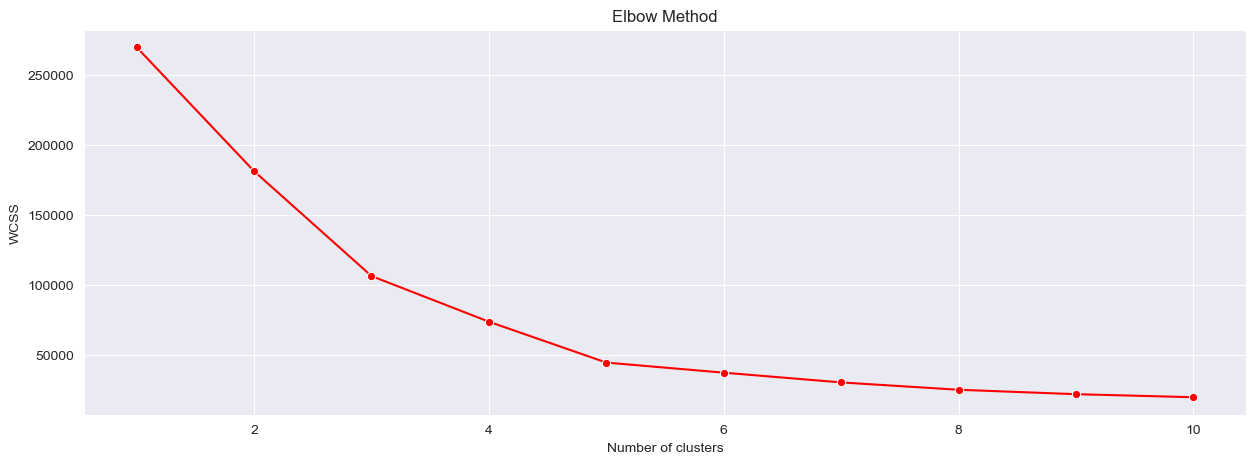

In [58]:
from sklearn.cluster import KMeans

# where we'll store all of the wcss (Within-Cluster-Sum-of-Squares) values for plotting later.
wcss = []
for i in range(1, 11):
    # random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11),y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- Try with `silhouette`, a different metric.

The value of the silhouette coefficient ranges from -1 to 1, with higher values indicating better clustering results

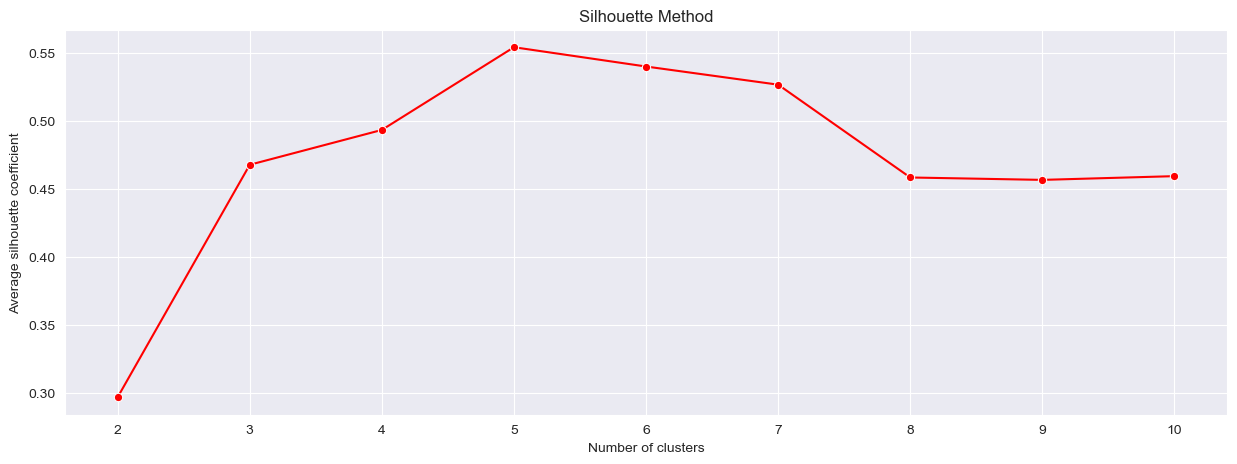

In [59]:
from sklearn.metrics import silhouette_score

metric_scores = []
for i in range(2, 11):
    # random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    # silhouette_score calculates the average silhouette coefficient for all samples.
    score = silhouette_score(X, kmeans.labels_)
    metric_scores.append(score)
    
# creating lineplot to visualize metric and find optimal number of clusters
sns.lineplot(x=range(2, 11), y=metric_scores, marker='o', color='red')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette coefficient')
plt.show()

Create our KMeans model and run our predictions on the X vector

In [60]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

Visualize our clusters.

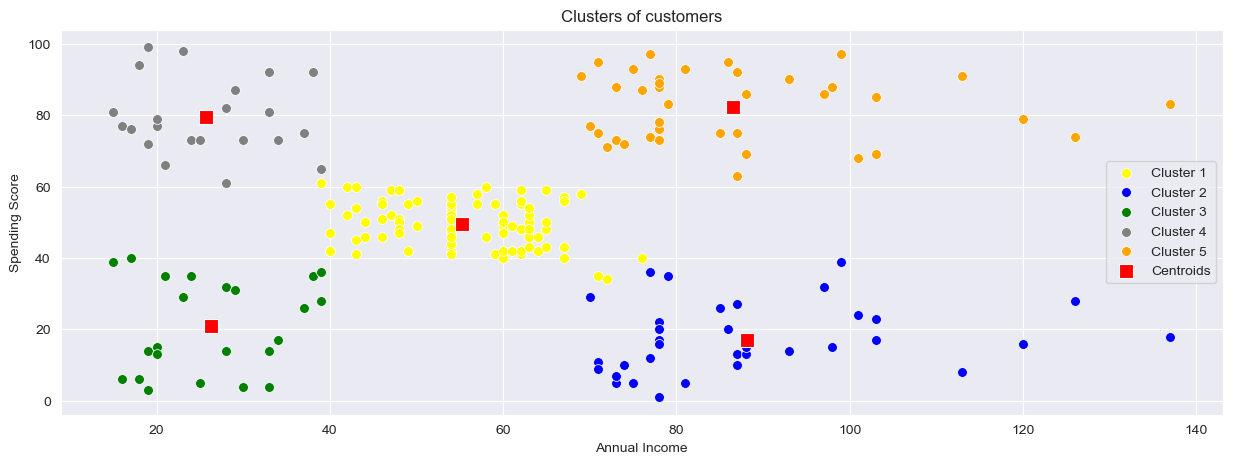

In [61]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

- Let's try with different number of clusters and initialization method

In [62]:
kmeans_1 = KMeans(n_clusters = 10, init = 'random', random_state = 45)
y_pred_1 = kmeans_1.fit_predict(X)

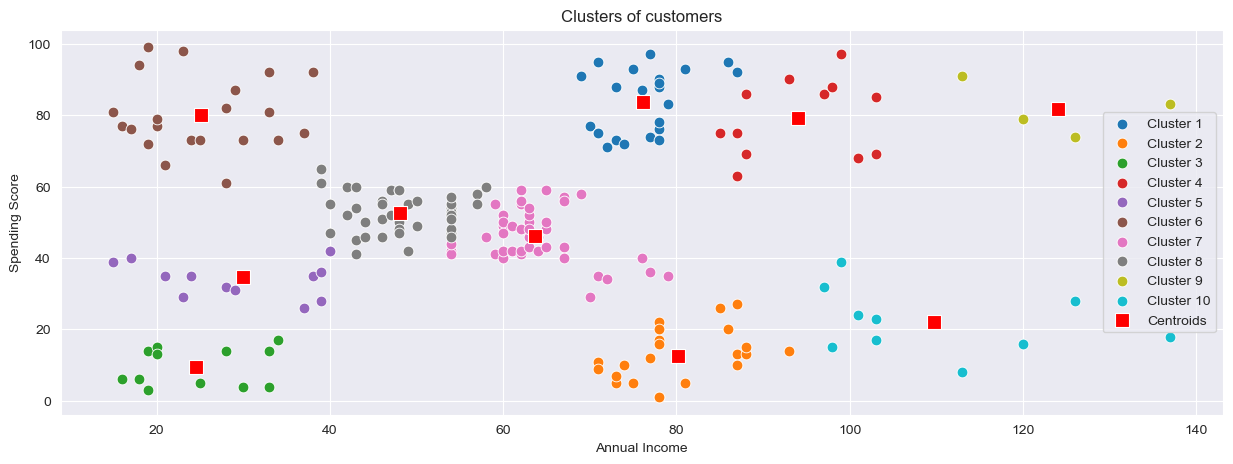

In [63]:
import matplotlib.colors as mcolors

# custom colors for each cluster
custom_colors = list(mcolors.TABLEAU_COLORS.values())

# plot 10 clusters
for i in range(0,10):
    sns.scatterplot(x=X[y_pred_1 == i, 0], y=X[y_pred_1 == i, 1], color = custom_colors[i], label = f'Cluster {i+1}',s=60)
sns.scatterplot(x=kmeans_1.cluster_centers_[:, 0], y=kmeans_1.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()